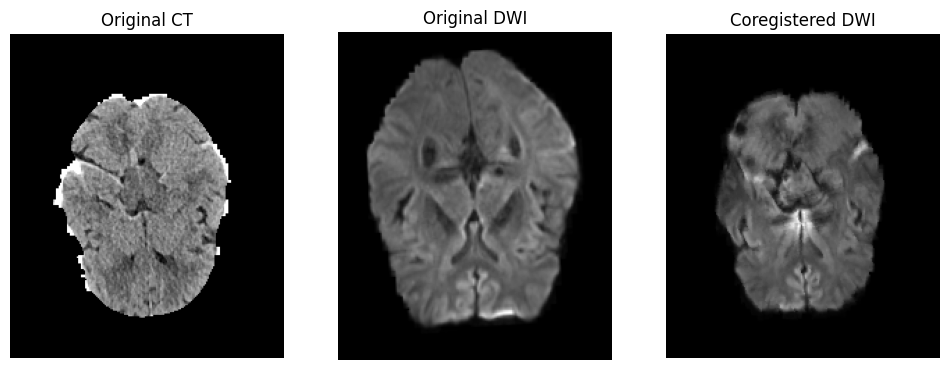

In [15]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Load your SimpleITK images (replace 'image1_path' and 'image2_path' with your file paths)
image1_sitk = sitk.ReadImage('/home/bruno/xfang/dataset/images/2342_1809174254_ct.nii.gz')
image2_sitk = sitk.ReadImage('/scratch4/rsteven1/examples/46361d46_20200308/46361d46_20200308_DWI_MNI.nii.gz')
image3_sitk = sitk.ReadImage('/scratch4/rsteven1/DWI_coregis_20231208/2342_1809174254_DWI_coregis.nii.gz')

# Convert SimpleITK images to NumPy arrays
image1_np = sitk.GetArrayFromImage(image1_sitk)
image2_np = sitk.GetArrayFromImage(image2_sitk)
image3_np = sitk.GetArrayFromImage(image3_sitk)

# Select a slice index (replace 'slice_index' with your desired slice number)
slice_index = 80  # Example index, adjust according to your data

# Extract the corresponding slices from both images
# slice1 = image1_np[slice_index, 70:120, 70:120]
# slice2 = image2_np[slice_index, 70:120, 70:120]
# slice3 = image3_np[slice_index, 70:120, 70:120]
slice1 = image1_np[slice_index, :, :]
slice2 = image2_np[slice_index, :, :]
slice3 = image3_np[slice_index, :, :]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(slice1, cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(slice2, cmap='gray')
plt.title('Original DWI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(slice3, cmap='gray')
plt.title('Coregistered DWI')
plt.axis('off')

plt.show()


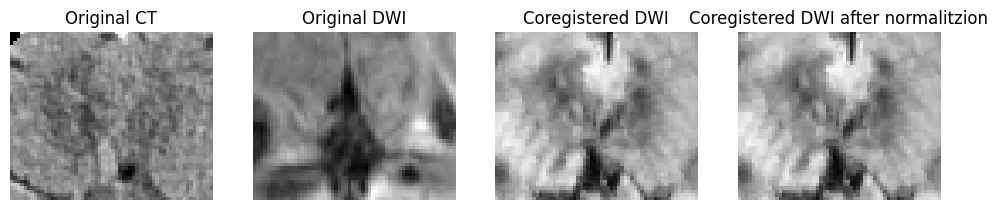

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

mri_instance_norm = nn.InstanceNorm3d(num_features=1, affine=True)

# Load your SimpleITK images (replace 'image1_path' and 'image2_path' with your file paths)
image1_sitk = sitk.ReadImage('/home/bruno/xfang/dataset/images/2342_1809174254_ct.nii.gz')
image2_sitk = sitk.ReadImage('/scratch4/rsteven1/examples/46361d46_20200308/46361d46_20200308_DWI_MNI.nii.gz')
image3_sitk = sitk.ReadImage('/scratch4/rsteven1/DWI_coregis_20231208/2342_1809174254_DWI_coregis.nii.gz')

# Convert SimpleITK images to NumPy arrays
image1_np = sitk.GetArrayFromImage(image1_sitk)
image2_np = sitk.GetArrayFromImage(image2_sitk)
image3_np = sitk.GetArrayFromImage(image3_sitk)

image4_tensor = torch.tensor(sitk.GetArrayFromImage(image3_sitk).astype(np.float32))
image4_np = mri_instance_norm(image4_tensor.unsqueeze(0)).detach().numpy()[0]

# Select a slice index (replace 'slice_index' with your desired slice number)
slice_index = 80  # Example index, adjust according to your data

# Extract the corresponding slices from both images
slice1 = image1_np[slice_index, 50:100, 60:120]
slice2 = image2_np[slice_index, 50:100, 60:120]
slice3 = image3_np[slice_index, 50:100, 60:120]
slice4 = image4_np[slice_index, 50:100, 60:120]
# slice1 = image1_np[slice_index, :, :]
# slice2 = image2_np[slice_index, :, :]
# slice3 = image3_np[slice_index, :, :]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(slice1, cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(slice2, cmap='gray')
plt.title('Original DWI')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(slice3, cmap='gray')
plt.title('Coregistered DWI')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(slice4, cmap='gray')
plt.title('Coregistered DWI after normalitzion')
plt.axis('off')

plt.show()
